In [11]:
import pandas as pd

data = pd.read_csv('../Data/Processed/processed.csv')

In [12]:
from sklearn.cluster import AgglomerativeClustering

affinities = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
linkages = ['ward', 'complete', 'average', 'single']




In [13]:
combinations = []

for affinity in affinities:
    for linkage in linkages:
        # Ward can only be used with euclidean
        if affinity == 'euclidean' or linkage != 'ward':
            combinations.append((affinity,linkage))

In [14]:
from sklearn.metrics import silhouette_score

silhouette_score_averages = []

for affinity, linkage in combinations:
    prediction = AgglomerativeClustering(affinity=affinity, linkage=linkage).fit_predict(X=data)
    silhouette_score_average = silhouette_score(data, prediction)
    silhouette_score_averages.append(silhouette_score_average)


In [15]:
silhouette_score_averages

[0.2881956100878649,
 0.4704565520226272,
 0.4704565520226272,
 0.4704565520226272,
 0.2535491433480789,
 0.4704565520226272,
 0.4704565520226272,
 0.4704565520226272,
 0.4704565520226272,
 0.4704565520226272,
 0.2535491433480789,
 0.4704565520226272,
 0.4704565520226272,
 0.27503076013279576,
 0.4704565520226272,
 0.21663822096620056]

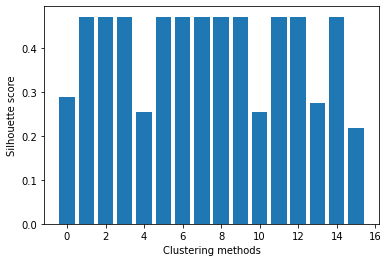

In [16]:
import matplotlib.pyplot as plt

plt.bar([i for i in range(len(silhouette_score_averages))], silhouette_score_averages)
plt.xlabel("Clustering methods")
plt.ylabel("Silhouette score")
plt.show()